# Color quantization

In [1]:
# adicionar as libs que irei precisar aqui
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

## Getting and rescaling the image

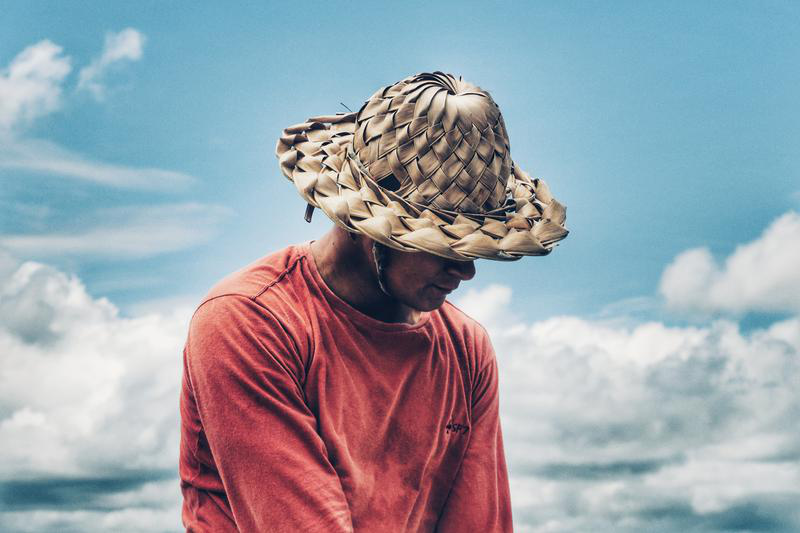

In [2]:
image = Image.open('images/oarsman.jpeg')          # read image (oarsman at https://omadson.github.io/photos/)
N, M = image.size                                  # get the number of columns (N) and rows (M)
image                                              # show resized image

## Transforming image into a data set

In [3]:
X = (
    np.asarray(image)                              # convert a PIL image to np array
    .reshape((N*M, 3))                             # reshape the image to convert each pixel to an instance of a data set
)

## Creating and fitting the model

In [4]:
model = KMeans(n_clusters=10)                        # create a Kmeans instance with 10 clusters
model.fit(X)                                         # fit the model

KMeans(n_clusters=10)

## Pixel quantization

In [5]:
labeld_X = model.predict(X)                          # get the label of each data point
transformed_X = model.cluster_centers_[labeld_X]     # pixel quantization into the centers

# Converting and saving image

In [6]:
quatized_array = (
    transformed_X
    .astype('uint8')                               # convert data points into 8-bit unsigned integers
    .reshape((M, N, 3))                            # reshape image
)

quatized_image = Image.fromarray(np.asarray(quatized_array))   # convert array into a PIL image object
quatized_image.save('images/oarsman_10colors.jpg') # save image

## Final result
### Original / Quantized

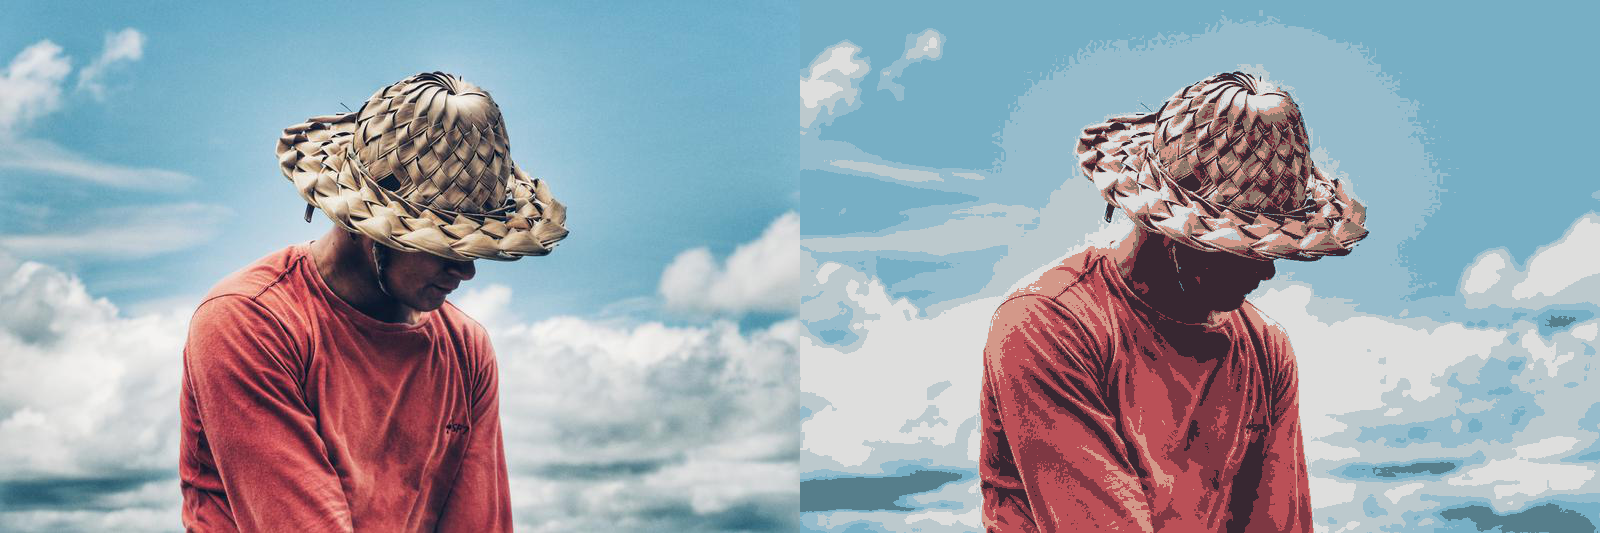

In [7]:
side_by_side = Image.fromarray(
    np.hstack([
        np.array(image),
        np.array(quatized_image)
    ])
)
side_by_side